## Loading Dependencies

In [1]:
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

### Loading Data for splitting and Sampling

In [3]:
df=pd.read_csv('Model_data1.csv')
df

,Annual_Income,Total_EMI_per_month,Interest_Rate,Num_Credit_Inquiries,Payment_of_Min_Amount,Num_Credit_Card,Num_Bank_Accounts,Credit_History_Age,Num_of_Delayed_Payment,Num_of_Loan,Credit_Mix,Age,Output
0,46477.560,212.248190,24,12.0,1,10,7,110.000000,22.0,6,0,39,0
1,153147.640,81.918963,3,1.0,0,4,5,308.000000,14.0,1,0,52,0
2,16833.105,51.702938,4,6.0,0,5,5,232.000000,15.0,4,0,39,2
3,131693.370,208.858473,10,6.0,0,7,0,267.000000,3.0,3,0,31,1
4,22233.980,39.598024,3,2.0,0,6,5,352.000000,0.0,4,0,33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63672,7749555.000,51.878854,9,0.0,2,7,5,269.000000,20.0,1,1,35,1
63673,132753.520,268.916569,6,2.0,0,4,5,224.000000,9.0,3,0,18,1
63674,26265.810,46.662502,17,6.0,2,3,3,221.138208,19.0,4,0,32,1
63675,31407.100,115.206873,29,325.0,2,7,7,77.000000,25.0,8,0,39,0


In [5]:
X=df.drop('Output',axis=1)
y=df['Output']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.2, random_state=1234)

## Imbalanced Dataset

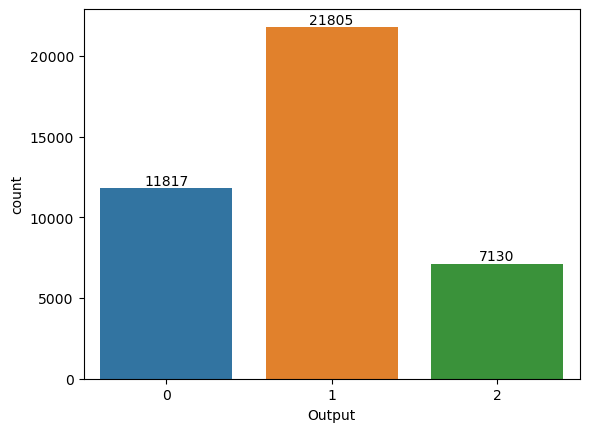

In [10]:
ax=sns.countplot(x=y_train)
for i in ax.containers:
    ax.bar_label(i)

## Using SMOTE + TOMEK links

In [11]:
smtom=SMOTETomek(random_state=1234)
X_train_smtom,y_train_smtom=smtom.fit_resample(X_train,y_train)

Output
2    20708
0    20138
1    19277
Name: count, dtype: int64


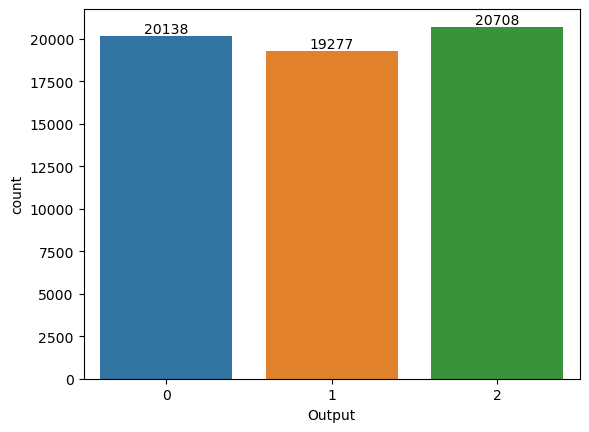

In [31]:
print(y_train_smtom.value_counts())
ax=sns.countplot(x=y_train_smtom)
for i in ax.containers:
    ax.bar_label(i)

## Uisng SMOTE + ENN

In [18]:
smenn=SMOTEENN(random_state=1234)
X_train_smenn,y_train_smenn=smenn.fit_resample(X_train,y_train)

Output
2    15129
0    13538
1     9286
Name: count, dtype: int64


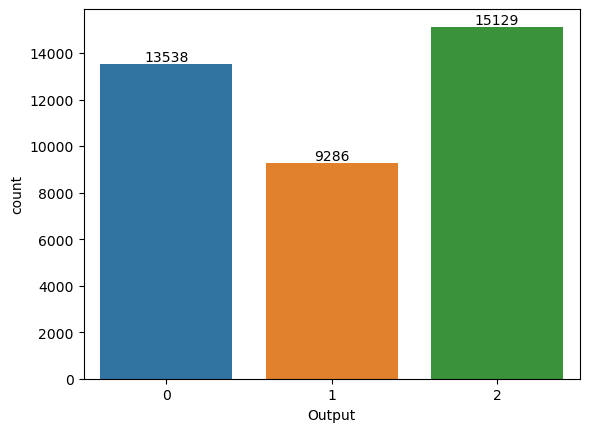

In [32]:
print(y_train_smenn.value_counts())
ax=sns.countplot(x=y_train_smenn)
for i in ax.containers:
    ax.bar_label(i)

# Saving
## Train Set:

In [22]:
df_smtom=X_train_smtom
df_smtom['Output']=y_train_smtom

In [24]:
df_smenn=X_train_smenn
df_smenn['Output']=y_train_smenn

In [27]:
df_smenn.to_csv('train_enn.csv',index=False)
df_smtom.to_csv('train_tom.csv',index=False)

## Dev and Test Set:

In [28]:
df_dev=X_dev
df_dev['Output']=y_dev

In [29]:
df_test=X_test
df_test['Output']=y_test

In [30]:
df_dev.to_csv('dev.csv',index=False)
df_test.to_csv('test.csv',index=False)

# ----------------------------------Done with the SAVING---------------------------------------------